##### Our goal is to predict the best caracteristics to have the best rank at StarCraft  game

#### Import libraries

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm, skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Loading the data

In [92]:
df = pd.read_csv('SkillCraft1_Dataset.csv')

## Quality of the dataset 

#### Inspecting the data

In [93]:
df.head()
#display first few rows

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [94]:
df.describe()
#summary statistics 

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [95]:
df.dtypes
#Check data types

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

#### Nettoyage de données

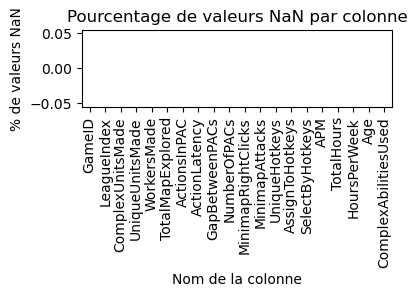

In [96]:
nan_percentages = df.isnull().sum() / len(df) * 100
nan_percentages = nan_percentages.sort_values(ascending=False)
# Créer un histogramme
plt.figure(figsize=(4, 1))
nan_percentages.plot(kind='bar')
plt.xlabel('Nom de la colonne')
plt.ylabel('% de valeurs NaN')
plt.title('Pourcentage de valeurs NaN par colonne')
plt.xticks(rotation=90)
plt.show()

There are no Nan values in the dataset so no need to use df.dropna()

In [97]:
#Convert categorical data into a numerical format
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['HoursPerWeek'] = pd.to_numeric(df['HoursPerWeek'], errors='coerce')
df['TotalHours'] = pd.to_numeric(df['TotalHours'], errors='coerce')
    
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['HoursPerWeek'].fillna(df['HoursPerWeek'].mean(), inplace=True)
df['TotalHours'].fillna(df['TotalHours'].mean(), inplace=True)
print("Type des colonnes : ", df.dtypes)

Type des colonnes :  GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


In [98]:
#Dropping the columns we are nnot going to use 
df.drop(['GameID'], axis=1, inplace=True)
print(df.columns)

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


We dropped GameID column because we want to predict the best characteristics to be in the best LeagueIndex and there are clearly no link between de GameID and the LeagueIndex. We will then use a heatmap to drop other columns

In [102]:
#We can now normalize the dataset as all columns are numerical
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [103]:
df.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.571429,0.392857,0.059524,0.002997,0.330799,0.081580,0.125384,0.7,0.036382,0.097089,0.571893,0.112814,0.110151,0.164167,0.433962,0.260161,0.363636,0.0,0.000000
1,0.571429,0.250000,0.059524,0.004997,0.291411,0.076675,0.148079,0.4,0.097391,0.107017,0.497565,0.113906,0.119858,0.169772,0.320755,0.220120,0.272727,0.0,0.067312
2,0.428571,0.500000,0.059524,0.000197,0.130248,0.025554,0.191515,0.4,0.097248,0.114188,0.308128,0.164793,0.336628,0.121319,0.320755,0.131610,0.363636,0.0,0.061212
3,0.285714,0.107143,0.119048,0.000397,0.232595,0.023987,0.121620,0.1,0.017645,0.134480,0.425632,0.097857,0.194654,0.174137,0.264151,0.068848,0.454545,0.0,0.124390
4,0.285714,0.571429,0.059524,0.000497,0.274168,0.026365,0.186810,0.2,0.000000,0.328786,0.231676,0.069516,0.249462,0.444035,0.188679,0.216374,0.181818,0.0,0.006244


## Data Exploration

### Distribution

We will now look the distribution to have a visual and quantitative understanding of the data. It helps in identifying patterns, trends, and anomalies, which are essential for making informed decisions and drawing accurate conclusions.


 mu = 0.45 and sigma = 0.22



C:\Users\jadoo\AppData\Local\Temp\ipykernel_23692\510791992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LeagueIndex'] , fit=norm);


Text(0.5, 1.0, 'Ranking distribution')

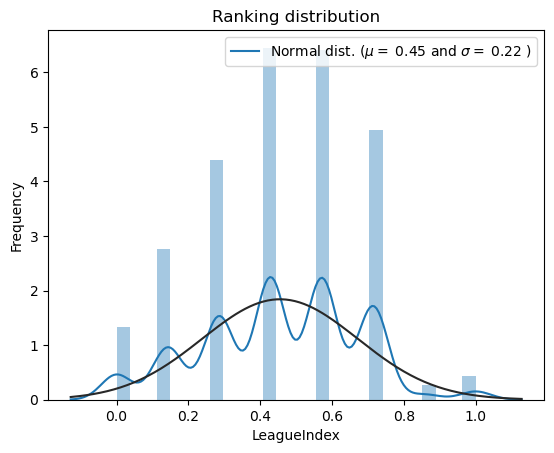

In [105]:
sns.distplot(df['LeagueIndex'] , fit=norm);

(mu, sigma) = norm.fit(df['LeagueIndex'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Ranking distribution')

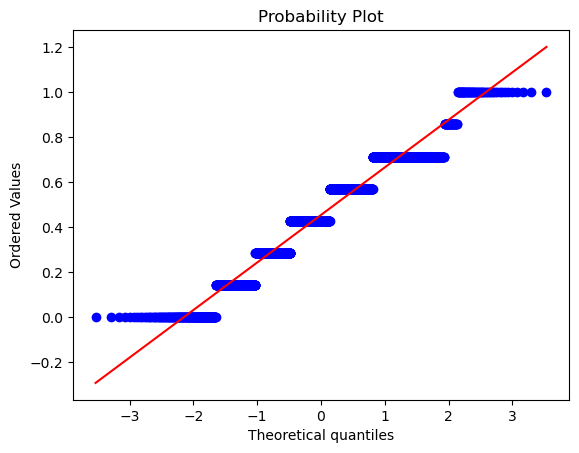

In [106]:
fig = plt.figure()
res = stats.probplot(df['LeagueIndex'], plot=plt)
plt.show()

These two graphics show that the data does not seem to follow a perfect normal distribution, as evidenced by the divergence of the plotted points from the red line, and a concentration of values highest between 0.4 and 0.6. This may suggest the presence of outliers, which is why we will try to drop these outliers with the descriptive statistics and to drop no reliable data with some vizualisations.

### Descriptive statistics 

We will first try to understand our dataset with basic vizualisation for several important columns

We show every graphic to see the outliers 

#### TotalHours

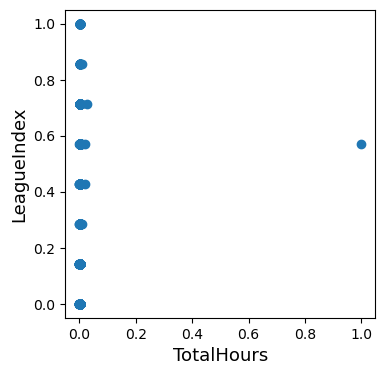

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x = df['TotalHours'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('TotalHours', fontsize=13)
#plt.xlim([0, 100000])
plt.show()

The dot at the end shows that someone played for 1,000,000 hours and this is messing up our graph. So we will set the limits to not plot it for now

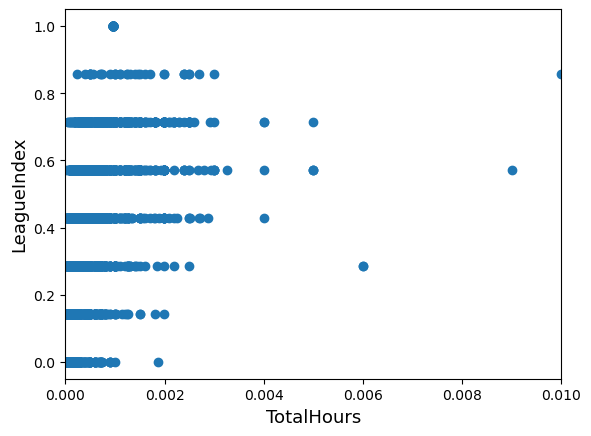

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = df['TotalHours'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('TotalHours', fontsize=13)
plt.xlim([0, 0.01])
plt.show()

After reflexion, we conclude that TotalHours is not a reliable data column because some people create new account after they trained a lot and this is messing our dataset and not helping for our prediction.

In [104]:
df.drop(['TotalHours'], axis=1, inplace=True)
print(df.columns)

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


#### APM

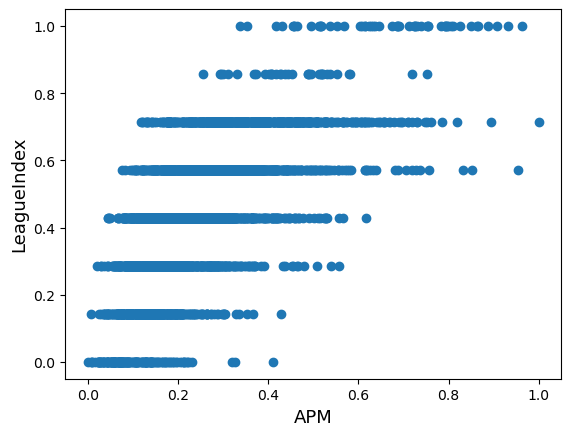

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = df['APM'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('APM', fontsize=13)
plt.show()

We can understand that there are no need to do a lot of actions/min to be at a good rank

#### NumberOfPACs

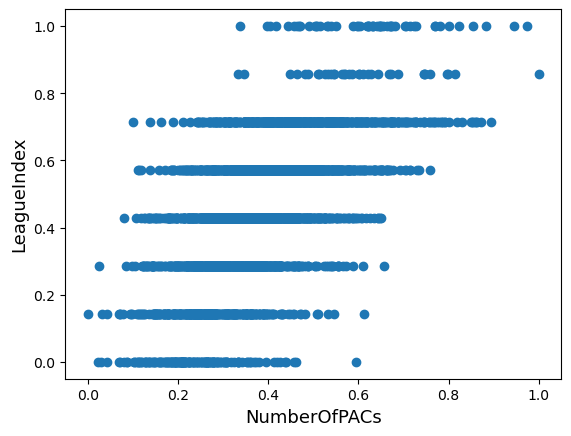

In [58]:
fig, ax = plt.subplots()
ax.scatter(x = df['NumberOfPACs'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('NumberOfPACs', fontsize=13)
plt.show()

PAC : Percepion Action Cycle = it is the number of action after realizing an information. So it is obvious that the best players have a big number of PACs

#### GapBetweenPACs

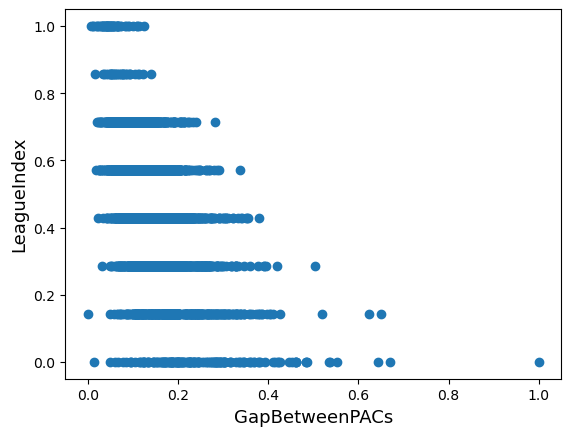

In [59]:
fig, ax = plt.subplots()
ax.scatter(x = df['GapBetweenPACs'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('GapBetweenPACs', fontsize=13)
plt.show()

PACs seem to be a very good predictor

#### SelectByHotkeys

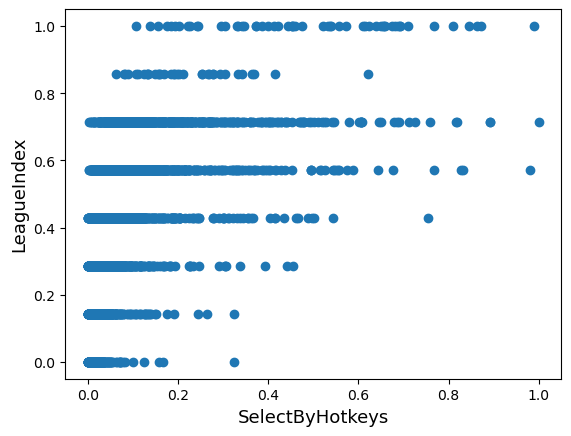

In [60]:
fig, ax = plt.subplots()
ax.scatter(x = df['SelectByHotkeys'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('SelectByHotkeys', fontsize=13)
plt.show()

There are Diamond and Master players who dont use hotkeys which is impressive

#### Age

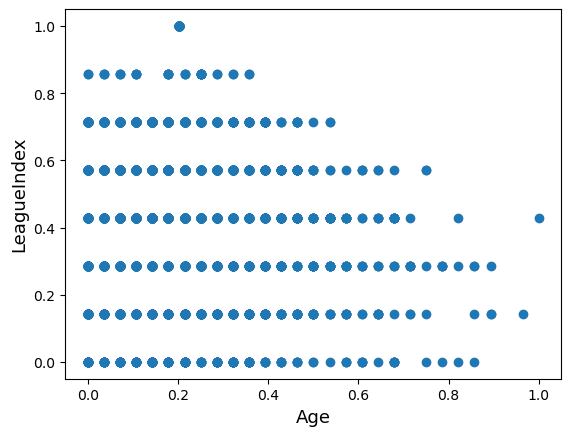

In [62]:
fig, ax = plt.subplots()
ax.scatter(x = df['Age'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.show()

It is not a suprise that the best players are also the youngest because they maybe have more time to play and train

### Visualizations

We will now try to understand the link between every columns and every data to better understand the dataset

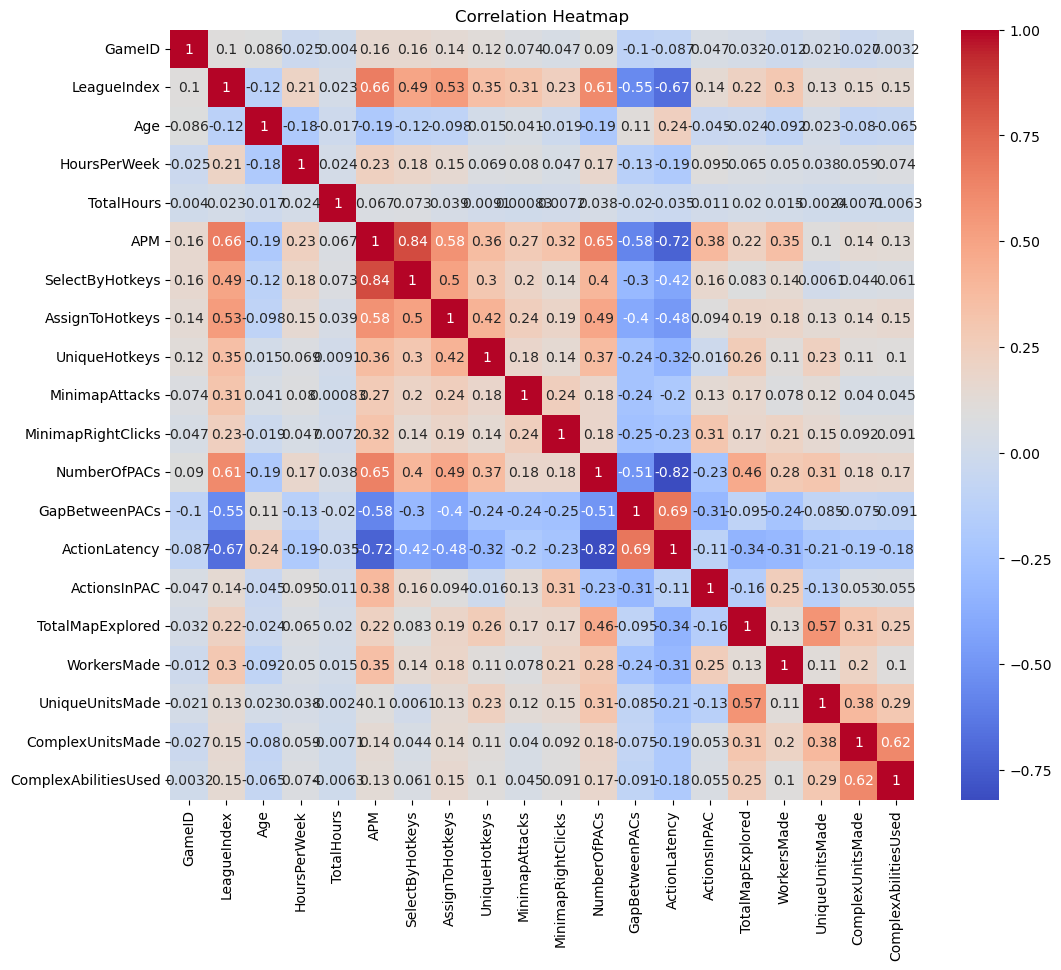

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

on prend les valeurs les plus innteressantes par rappor à LeagueIndex

## Splitting data

In [112]:
#The target variable is 'LeagueIndex'
X = df.drop('LeagueIndex', axis=1)
y = df['LeagueIndex']

In [113]:
#X will contain all the features, and y will contain the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Prediction

Pour prédire un rang catégorique (bronze, argent, or) on va utiliser un algorithme de classification. Si on voulait prédire un rang numérique (comme un score ou un classement), on aurait utilisé un algorithme de régression. On aurait utilisé un algorithme de clustering si ..........

The error message you're encountering indicates that your target variable 'LeagueIndex' is continuous, which means it's a numerical value that could potentially take on an infinite number of possibilities. The K-Nearest Neighbors algorithm as implemented in sklearn (KNeighborsClassifier) is a classification algorithm, which expects the target variable to be discrete categories (classes), not continuous values.

##### Exemples d algorithmes de classification  

- Régression logistique
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Arbres de Décision
- Random Forest
- Naive Bayes
- Réseaux de Neurones / Deep Learning

##### Exemples d algorithmes de regression

#### Linear regression

In [119]:
# Create the linear regression model
linear_reg_model = LinearRegression()

In [120]:
# Train the model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [121]:
# Predict the 'LeagueIndex' for the testing set
y_pred = linear_reg_model.predict(X_test)

In [122]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [123]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.019242757351663087
R-squared (R2): 0.5704218724208442


In [124]:
# If you want to see the coefficients for each feature
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
Age                      0.008472
HoursPerWeek             0.010280
APM                     -0.008333
SelectByHotkeys          0.037823
AssignToHotkeys          0.026422
UniqueHotkeys            0.010171
MinimapAttacks           0.027252
MinimapRightClicks       0.004118
NumberOfPACs             0.043075
GapBetweenPACs          -0.022521
ActionLatency           -0.059965
ActionsInPAC             0.012119
TotalMapExplored        -0.009273
WorkersMade              0.016577
UniqueUnitsMade         -0.007120
ComplexUnitsMade         0.004158
ComplexAbilitiesUsed     0.004906


Positive coefficients indicate that as the feature variable increases, the predicted value of LeagueIndex also increases.
Negative coefficients indicate that as the feature variable increases, the predicted value of LeagueIndex decreases.
Larger (absolute value) coefficients signify a greater impact on the LeagueIndex. 

Here is the order of features by their impact:

ActionLatency: -0.059965
GapBetweenPACs: -0.022521
SelectByHotkeys: 0.037823
NumberOfPACs: 0.043075
AssignToHotkeys: 0.026422
MinimapAttacks: 0.027252
TotalMapExplored: -0.009273
ComplexAbilitiesUsed: 0.004906
HoursPerWeek: 0.010280
Age: 0.008472

------------------------------------------------------ BROUILLON --------------------------------------------------------------

In [76]:
from IPython.display import display, HTML

In [80]:
html_content = """
<div class='alert-block alert-info'>
    <br>
    <h1 align="center"><b>Lab session 3:</b> Local search</h1>
    <h3 align="center">Artificial Intelligence Algorithms</h3>
    <h5 align="center">MESIIN476023</h5>
    <br>
</div>
"""
display(HTML(html_content))

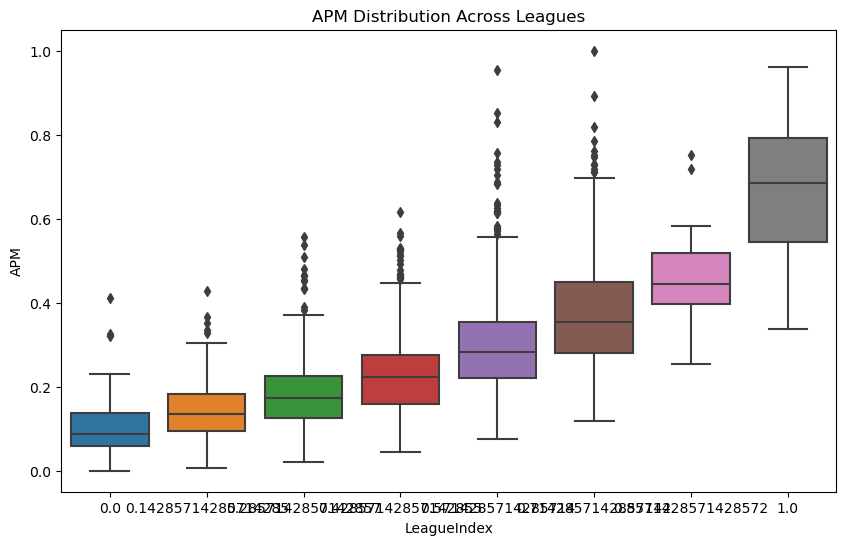

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeagueIndex', y='APM', data=df)
plt.title('APM Distribution Across Leagues')
plt.show()


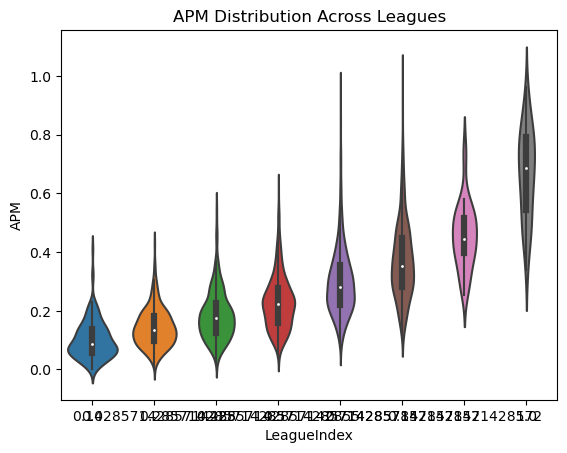

In [50]:
sns.violinplot(x="LeagueIndex", y="APM", data=df)
plt.title('APM Distribution Across Leagues')
plt.show()


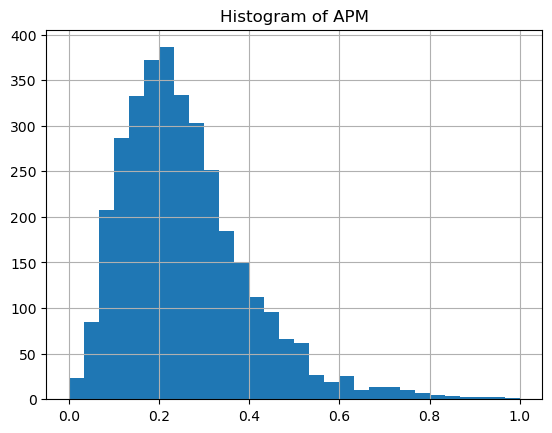

In [51]:
df['APM'].hist(bins=30)
plt.title('Histogram of APM')
plt.show()


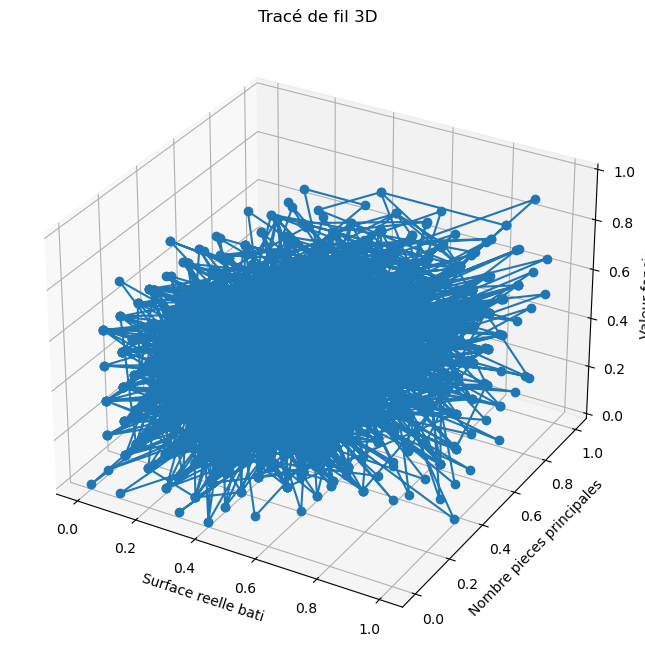

In [68]:
x = df["UniqueHotkeys"]
y = df["UniqueUnitsMade"]
z = df["LeagueIndex"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, linestyle='-', marker='o')
ax.set_xlabel("Surface reelle bati")
ax.set_ylabel("Nombre pieces principales")
ax.set_zlabel("Valeur fonciere")
ax.set_title("Tracé de fil 3D")
plt.show()